In [267]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)

In [268]:
#read the dataset
df = pd.read_csv('data.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [269]:
#shape of dataset
df.shape

(3347, 20)

In [270]:
#checking missing_values
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [271]:
#checking the duplicates
df_duplicates = df.duplicated()
print(df_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3342     True
3343     True
3344     True
3345     True
3346     True
Length: 3347, dtype: bool


In [272]:
#duplicate rows
df[df_duplicates]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3333,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
3334,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
3335,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
3336,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
3337,DC,130,area_code_510,no,no,0,132.4,81,22.51,200.3,110,17.03,202.5,103,9.11,6.0,1,1.62,2,no
3338,RI,89,area_code_415,no,yes,24,97.8,98,16.63,207.2,67,17.61,214.5,126,9.65,5.9,2,1.59,0,no
3339,ID,82,area_code_415,no,no,0,266.9,83,45.37,229.7,74,19.52,251.7,99,11.33,11.0,6,2.97,3,yes
3340,OK,138,area_code_510,no,yes,33,155.2,139,26.38,268.3,79,22.81,186.4,71,8.39,9.7,4,2.62,3,no
3341,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
3342,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no


In [273]:
print(df.shape)
#removing duplicates
df = df.drop_duplicates()
print(df.shape)

(3347, 20)
(3333, 20)


In [274]:
#getting max and min of total_day_calls
df['total_day_calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total_day_calls, dtype: float64

In [275]:
#unique number of states
df['state'].nunique()

51

In [276]:
# %churn rate
x = df['churn'].value_counts()
(x/x.sum()) * 100

no     85.508551
yes    14.491449
Name: churn, dtype: float64

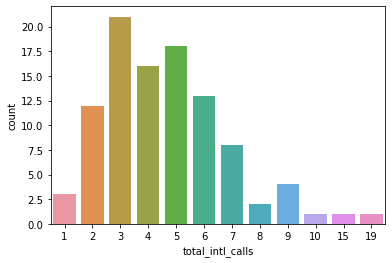

In [277]:
#plot of 100 rows of total_intl_call column
sns.countplot(df['total_intl_calls'].iloc[:100])

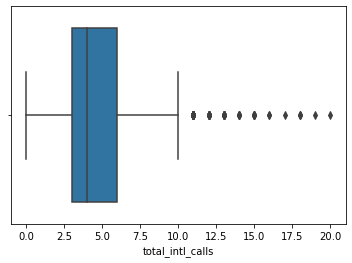

In [278]:
sns.boxplot(x = df['total_intl_calls'])

In [279]:
#creating new column in dataset 'total_eve_usage'
df['total_eve_usage'] = df['total_eve_calls'] + df['total_eve_minutes']
df['total_eve_usage'].head()

0    296.4
1    298.5
2    231.2
3    149.9
4    270.3
Name: total_eve_usage, dtype: float64

In [280]:
#creating new column 'status' with 1 and 0
x = []
for i in range(df.shape[0]):
    if df['churn'].iloc[i] == 'yes':
        x.append(1)
    elif df['churn'].iloc[i] == 'no':
        x.append(0)


In [281]:
x = pd.DataFrame(x)

In [282]:
df['status'] = x

In [283]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_usage,status
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no,296.4,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,298.5,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,231.2,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,149.9,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,270.3,0


In [284]:
#combining the minutes columns
df_minutes = df[['total_eve_minutes', 'total_night_minutes', 'total_day_minutes']]
df_minutes.head()

,total_eve_minutes,total_night_minutes,total_day_minutes
0,197.4,244.7,265.1
1,195.5,254.4,161.6
2,121.2,162.6,243.4
3,61.9,196.9,299.4
4,148.3,186.9,166.7


Text(0, 0.5, 'minutes')

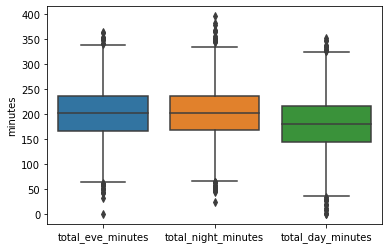

In [285]:
sns.boxplot(data = df_minutes, fliersize = 5, whis = 1.5).set_ylabel('minutes')

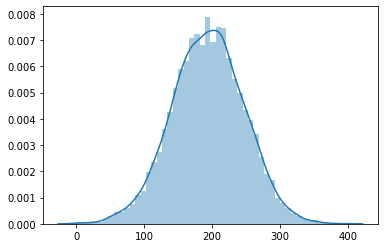

In [286]:
sns.distplot(df_minutes)

In [287]:
from scipy.stats import shapiro

In [288]:
df_minutes.skew()

total_eve_minutes     -0.023877
total_night_minutes    0.008921
total_day_minutes     -0.029077
dtype: float64

In [289]:
#labeling the values with 0 and 1
def plan(x):
    if x == 'yes':
        label = 1
    else:
        label = 0
    return label
df['international_plan'] = df['international_plan'].apply(lambda x: plan(x))

In [290]:
def voice_plan(y):
    if y == 'yes':
        label = 1
    else:
        label = 0
    return label
df['voice_mail_plan'] = df['voice_mail_plan'].apply(lambda y: plan(y))

In [291]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_usage,status
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no,296.4,0
1,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,298.5,0
2,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,231.2,0
3,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,149.9,0
4,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,270.3,0


In [292]:
#converting the strings into numerical 
from sklearn.preprocessing import LabelEncoder

In [293]:
labelencoder = LabelEncoder()
X_encoder = df.iloc[:,0].values
Y_encoder = df.iloc[:,2].values

In [294]:
X_encoder = labelencoder.fit_transform(X_encoder)
Y_encoder = labelencoder.fit_transform(Y_encoder)

In [295]:
df['state'] = X_encoder
df['area_code'] = Y_encoder

In [296]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_usage,status
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no,296.4,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,298.5,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,231.2,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,149.9,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,270.3,0


In [297]:
#dropping the churn variable
df_ = df.drop('churn', axis = 1)

In [298]:
df_calls = df[['total_day_calls', 'total_eve_calls', 'total_night_calls']]

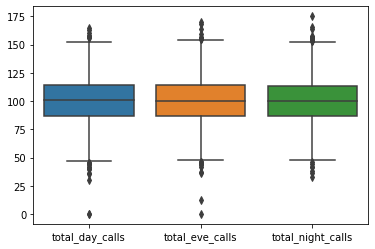

In [299]:
sns.boxplot(data = df_calls)

In [300]:
df_calls.head()

,total_day_calls,total_eve_calls,total_night_calls
0,110,99,91
1,123,103,103
2,114,110,104
3,71,88,89
4,113,122,121


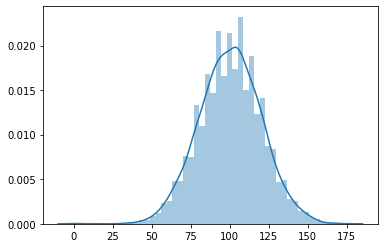

In [301]:
sns.distplot(df_calls)

In [302]:
df_charge = df[['total_day_charge', 'total_eve_charge', 'total_night_charge']]
df_charge

,total_day_charge,total_eve_charge,total_night_charge
0,45.07,16.78,11.01
1,27.47,16.62,11.45
2,41.38,10.30,7.32
3,50.90,5.26,8.86
4,28.34,12.61,8.41
...,...,...,...
3328,26.55,18.32,12.56
3329,39.29,13.04,8.61
3330,30.74,24.55,8.64
3331,36.35,13.57,6.26


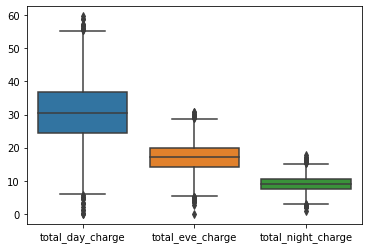

In [303]:
sns.boxplot(data = df_charge)

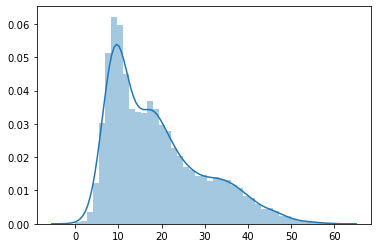

In [304]:
sns.distplot(df_charge)

In [305]:
df_charge.skew()

total_day_charge     -0.029083
total_eve_charge     -0.023858
total_night_charge    0.008886
dtype: float64

In [306]:
df_international = df[['total_intl_calls', 'total_intl_charge', 'total_intl_minutes']]
df_international.head()

,total_intl_calls,total_intl_charge,total_intl_minutes
0,3,2.70,10.0
1,3,3.70,13.7
2,5,3.29,12.2
3,7,1.78,6.6
4,3,2.73,10.1


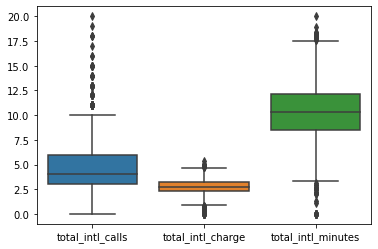

In [307]:
sns.boxplot(data = df_international)

In [308]:
df_numerical = pd.concat([df_charge, df_calls, df_minutes], axis = 1)
df_numerical.head()

,total_day_charge,total_eve_charge,total_night_charge,total_day_calls,total_eve_calls,total_night_calls,total_eve_minutes,total_night_minutes,total_day_minutes
0,45.07,16.78,11.01,110,99,91,197.4,244.7,265.1
1,27.47,16.62,11.45,123,103,103,195.5,254.4,161.6
2,41.38,10.30,7.32,114,110,104,121.2,162.6,243.4
3,50.90,5.26,8.86,71,88,89,61.9,196.9,299.4
4,28.34,12.61,8.41,113,122,121,148.3,186.9,166.7


In [309]:
#removing the outliers based on z-score
df_ = df_[np.abs(stats.zscore(df_numerical) < 3).all(axis = 1)]
df_.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_eve_usage,status
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,296.4,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,298.5,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,231.2,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,149.9,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,270.3,0


In [310]:
df_.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_eve_usage,status
state,1.000000,0.003764,0.014506,-0.006010,-0.031085,-0.027572,-0.007582,0.000202,-0.007582,0.013899,-0.015059,0.013892,0.024695,0.008471,0.024695,-0.007680,0.013510,-0.007664,-0.026114,0.007473,0.007986
account_length,0.003764,1.000000,-0.014377,0.024783,0.003838,-0.004383,0.006050,0.039108,0.006049,-0.008891,0.018180,-0.008878,-0.010409,-0.010684,-0.010413,0.008159,0.020283,0.008189,-0.004817,-0.001638,0.014955
area_code,0.014506,-0.014377,1.000000,0.044186,0.008715,0.008626,0.009078,-0.008306,0.009081,0.003104,-0.003780,0.003126,0.007423,0.028600,0.007404,0.002542,-0.009919,0.002429,0.028866,0.001516,0.004324
international_plan,-0.006010,0.024783,0.044186,1.000000,0.007991,0.010634,0.043511,0.006483,0.043513,0.016480,0.008257,0.016487,-0.027347,0.012375,-0.027354,0.042256,0.014982,0.042168,-0.026269,0.018461,0.256394
voice_mail_plan,-0.031085,0.003838,0.008715,0.007991,1.000000,0.957088,0.001376,-0.012628,0.001375,0.019472,-0.009031,0.019485,0.005108,0.012282,0.005092,0.001703,0.009713,0.001745,-0.018320,0.014905,-0.099378
number_vmail_messages,-0.027572,-0.004383,0.008626,0.010634,0.957088,1.000000,0.004382,-0.010966,0.004379,0.014531,-0.008906,0.014547,0.008390,0.003722,0.008371,0.005964,0.015834,0.005993,-0.014002,0.010326,-0.087040
total_day_minutes,-0.007582,0.006050,0.009078,0.043511,0.001376,0.004382,1.000000,0.012433,1.000000,0.006026,0.019191,0.006012,0.001319,0.025053,0.001296,-0.010815,0.003894,-0.010752,-0.010772,0.012695,0.198716
total_day_calls,0.000202,0.039108,-0.008306,0.006483,-0.012628,-0.010966,0.012433,1.000000,0.012437,-0.014783,0.007342,-0.014780,0.023977,-0.019049,0.023965,0.022370,0.004732,0.022480,-0.024013,-0.011138,0.018974
total_day_charge,-0.007582,0.006049,0.009081,0.043513,0.001375,0.004379,1.000000,0.012437,1.000000,0.006033,0.019191,0.006019,0.001318,0.025054,0.001296,-0.010817,0.003892,-0.010754,-0.010776,0.012702,0.198716
total_eve_minutes,0.013899,-0.008891,0.003104,0.016480,0.019472,0.014531,0.006026,-0.014783,0.006033,1.000000,-0.016269,1.000000,-0.011972,0.005284,-0.011982,-0.011460,0.006849,-0.011482,-0.014627,0.929993,0.090430


In [311]:
df_.shape

(3312, 21)

In [312]:
#preparing the dataset
X = df_.drop('status', axis = 1)
y = df_['status']

In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [314]:
#RFE with cross_validation with 10 fold
rfc = RandomForestClassifier(random_state = 1001)
rfecv = RFECV(estimator = rfc, step = 1, cv = StratifiedKFold(10), scoring = 'accuracy')
rfecv.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=1001), scoring='accuracy')

In [315]:
print('optimal number of features: {}'.format(rfecv.n_features_))

optimal number of features: 13


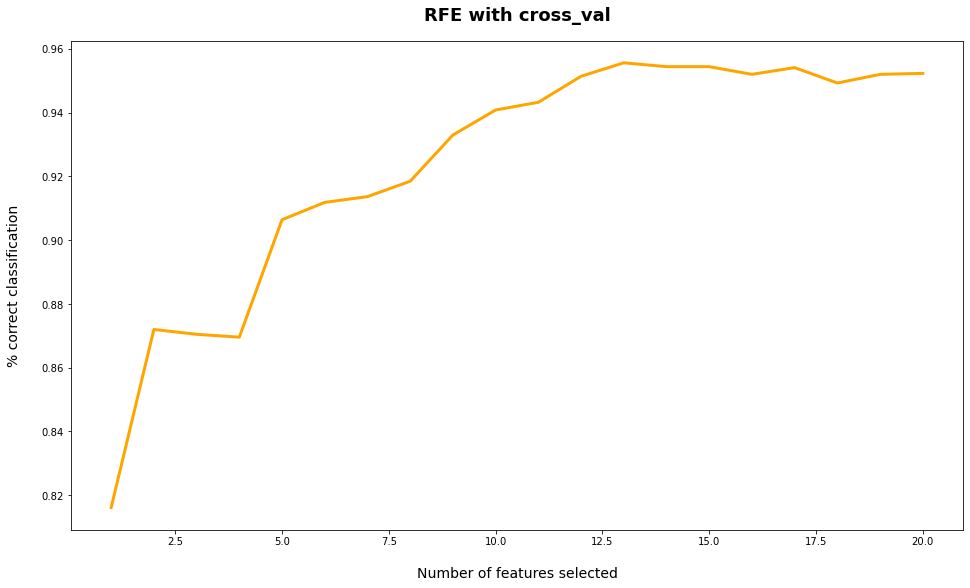

In [316]:
plt.figure(figsize = (16,9))
plt.title('RFE with cross_val', fontsize = 18, fontweight = 'bold', pad = 20)

plt.xlabel('Number of features selected', fontsize = 14, labelpad = 20)
plt.ylabel('% correct classification', fontsize = 14, labelpad = 20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color = 'orange', linewidth = 3)

In [317]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [318]:
rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 13)

In [319]:
rfe = rfe.fit(X,y)

In [320]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False  True  True False  True  True False  True
  True False  True  True  True  True  True  True]
[6 3 8 1 7 1 1 4 1 1 5 1 1 2 1 1 1 1 1 1]


In [321]:
#highly correlated features with target variable
df_importance = df_.iloc[:,[3,5,6,8,9,11,12,14,15,16,17,18,19]]

In [322]:
df_importance.corr()

,international_plan,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_eve_usage
international_plan,1.000000,0.010634,0.043511,0.043513,0.016480,0.016487,-0.027347,-0.027354,0.042256,0.014982,0.042168,-0.026269,0.018461
number_vmail_messages,0.010634,1.000000,0.004382,0.004379,0.014531,0.014547,0.008390,0.008371,0.005964,0.015834,0.005993,-0.014002,0.010326
total_day_minutes,0.043511,0.004382,1.000000,1.000000,0.006026,0.006012,0.001319,0.001296,-0.010815,0.003894,-0.010752,-0.010772,0.012695
total_day_charge,0.043513,0.004379,1.000000,1.000000,0.006033,0.006019,0.001318,0.001296,-0.010817,0.003892,-0.010754,-0.010776,0.012702
total_eve_minutes,0.016480,0.014531,0.006026,0.006033,1.000000,1.000000,-0.011972,-0.011982,-0.011460,0.006849,-0.011482,-0.014627,0.929993
total_eve_charge,0.016487,0.014547,0.006012,0.006019,1.000000,1.000000,-0.011984,-0.011994,-0.011468,0.006849,-0.011489,-0.014629,0.929995
total_night_minutes,-0.027347,0.008390,0.001319,0.001318,-0.011972,-0.011984,1.000000,0.999999,-0.014906,-0.013524,-0.014900,-0.006472,-0.009837
total_night_charge,-0.027354,0.008371,0.001296,0.001296,-0.011982,-0.011994,0.999999,1.000000,-0.014913,-0.013500,-0.014907,-0.006462,-0.009834
total_intl_minutes,0.042256,0.005964,-0.010815,-0.010817,-0.011460,-0.011468,-0.014906,-0.014913,1.000000,0.031242,0.999993,-0.012438,-0.006778
total_intl_calls,0.014982,0.015834,0.003894,0.003892,0.006849,0.006849,-0.013524,-0.013500,0.031242,1.000000,0.031305,-0.016795,0.013721


In [323]:
#highly correlated features with other independent variable
df_importance.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'total_eve_usage'], axis = 1, inplace = True)

In [324]:
df_importance.head()

,international_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0,25,265.1,197.4,244.7,10.0,3,1
1,0,26,161.6,195.5,254.4,13.7,3,1
2,0,0,243.4,121.2,162.6,12.2,5,0
3,1,0,299.4,61.9,196.9,6.6,7,2
4,1,0,166.7,148.3,186.9,10.1,3,3


In [325]:
X = df_importance

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1001)

In [328]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2318, 8)
(994, 8)
(2318,)
(994,)


#### RandomForestClassifier

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 1001)

In [331]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=1001)

In [332]:
y_pred = rfc.predict(X_test)

In [333]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9486921529175051

In [334]:
pd.crosstab(y_test, y_pred, colnames = ['predictions'])

predictions,0,1
status,,
0,853,1
1,50,90


In [335]:
# Iterating the model with variable max_depth
train_accuracy = []
test_accuracy = []
for depth in range(1,21):
    dt_model = RandomForestClassifier(max_depth = depth, random_state=1001)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [336]:
frame = pd.DataFrame({'max_depth':range(1,21), 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy})

In [337]:
# training the model with max_depth = 14 (high accuracy)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 14, random_state = 1001)

In [338]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, random_state=1001)

In [339]:
y_pred = rfc.predict(X_test)

In [340]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9617706237424547

In [341]:
# Confusion Matrix to evaluate
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[851,   3],
       [ 35, 105]], dtype=int64)

In [342]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.99648712, 0.75      ])

In [343]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.96049661, 0.97222222])

In [344]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.97816092, 0.84677419])

In [345]:
pd.crosstab(y_test, y_pred, colnames = ['predictions'])

predictions,0,1
status,,
0,851,3
1,35,105
